The aim of this notebook is to find the point at which the 1pct CO2 model branches off to the ZECMIP expereiment. This has to be done with the raw output from the 

In [1]:
import os, sys
import json

import numpy as np
import pandas as pd
import xarray as xr

from functools import partial
import matplotlib.pyplot as plt

from pprint import pprint

sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD', 'modules'))

In [2]:
import open_ds

In [3]:
# File that contains all the saved paths for zecmip runs
with open(os.path.join(os.getcwd(), 'Documents', 'PhD', 'data', 'zecmip_experiment_paths.json'), 'r') as f:
    zecmip_model_paths = json.loads(f.read())

In [4]:
pprint(zecmip_model_paths)

{'ACCESS-ESM1-5': {'1000pgc': '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191206',
                   '1pct': '/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/1pctCO2/r1i1p1f1/Amon/tas/gn/v20191115',
                   'picontrol': '/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Amon/tas/gn/v20210316'},
 'CESM2_r1i1p1f1_Amon': {'1000pgc': '/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191119',
                         '1pct': '/g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/1pctCO2/r1i1p1f1/Amon/tas/gn/v20190425',
                         'picontrol': '/g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/piControl/r1i1p1f1/Amon/tas/gn/v20190320'},
 'CanESM5_r1i1p2f1_Amon': {'1000pgc': '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429',
                           '1pct': '/g/data/oi10/replicas/CMIP6/CMIP/CC

In [5]:
# Opening all the needed experiments with the open_and_raname function. This function
# takes an function as an arguement on how to open the dataset. For this a xr.open_mfdataset
# with use_cftime=True filled.
a1_ds_raw_list = [open_ds.open_and_rename(os.path.join(obj['1000pgc'], '*.nc'),  partial(xr.open_mfdataset, use_cftime=True))
                          for obj in zecmip_model_paths.values()]

CanESM5
MIROC-ES2L
UKESM1-0-LL
MPI-ESM1-2-LR
GISS-E2-1-G-CC
CESM2


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/conventions.py:543: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/conventions.py:543: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/conventions.py:543: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


NorESM2-LM
GFDL-ESM4
ACCESS-ESM1-5


In [6]:
pct_ds_raw_list = [open_ds.open_and_rename(os.path.join(obj['1pct'], '*.nc'),  partial(xr.open_mfdataset, use_cftime=True))
                          for obj in zecmip_model_paths.values()]

CanESM5
MIROC-ES2L
UKESM1-0-LL
MPI-ESM1-2-LR
GISS-E2-1-G
CESM2


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/conventions.py:543: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/conventions.py:543: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/conventions.py:543: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


NorESM2-LM
GFDL-ESM4
ACCESS-ESM1-5


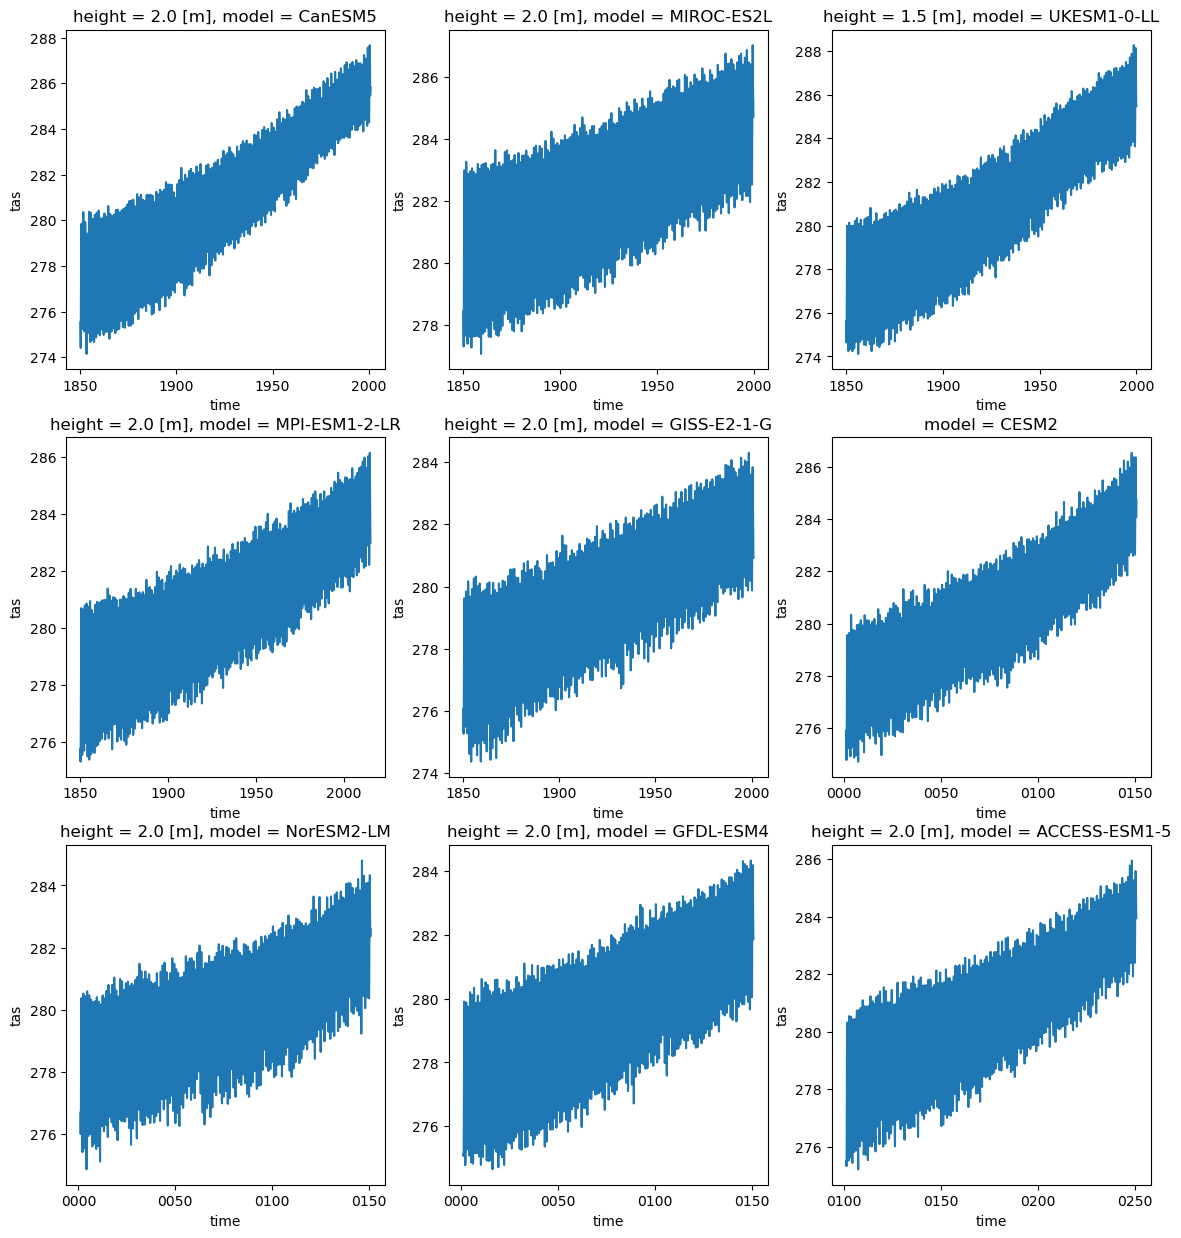

In [7]:
fig = plt.figure(figsize=(14,15))

for i,ds in enumerate(pct_ds_raw_list):
    ax = fig.add_subplot(3,3, i+1)
    ds.mean(dim=['lat', 'lon']).tas.plot(ax=ax)

In [20]:
branch_time_obj = {}  # Dictionary to store branch time information

# Iterate over a1_ds_raw_list
for ds_1pct, ds_a1 in zip(pct_ds_raw_list, a1_ds_raw_list):
    # Find the matching ds object in pct_ds_raw_list based on model value
    print(f'{ds_1pct.model.values[0]}:{ds_a1.model.values[0]} : {ds_a1.time.values[0]}')
    
    # Get the branch start time
    branch_start_time = ds_a1.time.values[0]
    
    # Get time values from ds_1pct
    onepct_time_values = ds_1pct.time.values
    
    # Find the index of the branch start time in onepct_time_values
    onepct_branch_arg_in_months = np.where(onepct_time_values == branch_start_time)[0][0]
    
    # Store the branch time information in the dictionary
    onepct_branch_arg_in_year = ds_a1.time.values[onepct_branch_arg_in_months].year - ds_a1.time.values[0].year
    branch_time_obj[ds_a1.model.values[0]] = int(onepct_branch_arg_in_year)

CanESM5:CanESM5 : 1911-01-16 12:00:00
MIROC-ES2L:MIROC-ES2L : 1913-01-16 12:00:00
UKESM1-0-LL:UKESM1-0-LL : 1916-01-16 00:00:00
MPI-ESM1-2-LR:MPI-ESM1-2-LR : 1915-01-16 12:00:00
GISS-E2-1-G:GISS-E2-1-G-CC : 1920-01-16 12:00:00
CESM2:CESM2 : 0068-01-15 12:00:00
NorESM2-LM:NorESM2-LM : 0067-01-16 12:00:00
GFDL-ESM4:GFDL-ESM4 : 0064-01-16 12:00:00
ACCESS-ESM1-5:ACCESS-ESM1-5 : 0168-01-16 12:00:00


In [21]:
branch_time_obj_2 = {'metadata': 'This is the year that the 1pct CO2 run branchs off to the ZECMIP experiment.',
                    'branch_year':branch_time_obj}

In [24]:
pprint(branch_time_obj_2)

{'branch_year': {'ACCESS-ESM1-5': 67,
                 'CESM2': 67,
                 'CanESM5': 61,
                 'GFDL-ESM4': 63,
                 'GISS-E2-1-G-CC': 70,
                 'MIROC-ES2L': 63,
                 'MPI-ESM1-2-LR': 65,
                 'NorESM2-LM': 66,
                 'UKESM1-0-LL': 66},
 'metadata': 'This is the year that the 1pct CO2 run branchs off to the ZECMIP '
             'experiment.'}


In [25]:
with open(os.path.join(os.getcwd(), 'Documents', 'PhD', 'data','zecmip_onepercent_branch_point.json'),'w') as fp:
    json.dump(branch_time_obj_2, fp)

In [27]:
with open(os.path.join(os.getcwd(), 'Documents', 'PhD', 'data','zecmip_onepercent_branch_point.json'),'r') as fp:
    pprint(json.loads(fp.read()))

{'branch_year': {'ACCESS-ESM1-5': 67,
                 'CESM2': 67,
                 'CanESM5': 61,
                 'GFDL-ESM4': 63,
                 'GISS-E2-1-G-CC': 70,
                 'MIROC-ES2L': 63,
                 'MPI-ESM1-2-LR': 65,
                 'NorESM2-LM': 66,
                 'UKESM1-0-LL': 66},
 'metadata': 'This is the year that the 1pct CO2 run branchs off to the ZECMIP '
             'experiment.'}
